# Introduction to Neural Networks

**This notebook will go through the basics of Modular programming (setting up classes, calling functions from other files, using classes, etc) which will lay the foundation for our own mini python deep-learning library.**

- Also, I will make the basic building block of a Neural Neural, slowly increasing it's complexity to a Deep Neural Network with various optimization, processing, regularization and other techniques.
- Running the model on different datasets
- Devising our own way to analyse results through graphs and visuals

## Basics of Neural Network

What comes to your mind when you hear the term Neural? I am sure it reminds you of something related to the Human brain. That is actually the place this term Neural Network came from. Our brain is actually a **complex mesh network of "neurons"** which processes the incoming information to it and passes it to the next neuron untill it reaches the receptor. This simple process makes our brain control the body functions, including thought, emotion, response, sense, etc.

- Here is a simple image of our brain, showing different sections responsible for response to different senses.
  <table>
      <tr>
          <td><img src="Images/Senses.png" style="width: 400px"></td>
          <td><img src="Images/neuron.png" style="width: 400px"></td>
      </tr>
  </table>
  
- And an image of a neuron which receives information from the dendrites at the one end, processes the information inside and passing it finally to another neuron(whose dendrites are attached to the end of this neuron) through axon terminal.

**_Neural Network shares a similar story!_**

Neural Network lays the foundation of the modern AI, from your _Google translate_ to your phone's _voice assistant_, from your mail _spam filter_ to the keyboard next words _auto suggestion_, from the _self-driving cars_ to the _ChatGPT_, from _image generation_ softwares(like Midjourney, Dalle) to your Netflix _Recommender system_, and much more...

Just like the way brain wires itself to process lots of information, thereby producing a useful output which stimulates responses based on the sensory receptor(smell, hearing, vision, etc) it sourced to, Neural Network too **computes hundreds of thousands of calculation**, processes the information it was given and outputs a useful result for the information. And just how our brain processes information related to hearing, vision, language understanding, logics, etc, Neural Networks strange can process similar information using hundreds of neurons, doing large number of mathematical calculations.

- _**Here is a simple Neural Network for predicting hand written digits, enough to spark curiousity in you.**_ Credits: 3blue1brown on youtube.

<img src="Images/nn.gif" style="margin: 2rem auto">

_In this notebook, we will be going through the basic working of Neural Networks, mathematical intuition behind its working, will build Neural Network of our own, will add lots of complexity to our basic network to make it process large dataset producing better results and finally we will study different variations of Neural Networks for different tasks. So, let's get started!_

### So, here is a simple definition of Neural Network!

A neural network consist of neurons which are simply a **mathematical function** taking some input, doing some calculations and outputting the value of the function. A NN can have _few neurons to hundreds of thousands of neuron_. Together, they make up a very strong model that works similar to the brain and have the capacity to process any kind of information(text, voice, languages, tabular, logical, etc), given the correct _NN architecture_.

**Universal function Approximator:** A Neural Network is popularly known as the **Black Box**, meaning something that can process and approximate anything you put inside the box. So, when we send to the NN a simple data table with X as random numbers and y mapping X to it its square without specifying the function, the NN will figure out the squared function mapping. Similarly, it can figure out any kind of data mapping, approximating for any kind of function, hence abbreviated as _the Universal function approximator_.

#### Mathemical intuition

_Here is the simple picture to understand an artificial neuron:_

<img src="Images/artificial_neuron.png" style="margin: 2rem auto; width: 400px">

_Here, the neuron takes inputs(some weights are associated with each input), process the information inside mathematically, and outputs the final value._

And here is an image of a simple Neural Network, with each node acting as a neuron, recieving weighted inputs from all the nodes of the previous layer and providing it's weighted output to all the nodes of the subsequent layer.

<img src="Images/simple_nn.png" style="margin: 2rem auto; width: 200px">

_Here, the input layer consists of input neurons(3 here) taking input data, and output layer consists of output neurons(3 outputs). This Neural Network also has a **hidden layer** with its own neurons(4) making the network more complex and processing the data better (as now more complex calculation are associated with the network, making it unleashing more properties associated with the data)._

Here is a simple example, let's say we have an input data consisting of housing prices with data properties like number of bedrooms, number of bathrooms, total squared area, etc. So the hidden layers will figure out the _complex properties associated_ with the input layer, like more prices if area is more, more price if number of bedrooms is more, etc using some complex mathematical function like (for example): $$node\_1 = \sqrt{w1*number\_bedrooms + w2*number\_bathrooms}$$
Each node will perform some complex calculations w.r.t its inputs, associating neuron with some particular hidden properties. These hidden properties then plays a very crucial role in understanding the data, modelling it to learn the **X->y mapping**.

#### _Now, lets look at the working of a Neural Network_

A neuron, as we discussed earlier, takes weighted inputs from all its precedent layer, wrap it in some function to give output. _And here is how the whole network works_:

- First the architechture of the NN is decided (which includes number of hidden layers and number of nodes in each hidden layers)
- Since each node of a particular layer will connect to each nodes of the next layer, **weights** of each of the connection is randomly assigned to neurons of each layer, and **bias** is also assigned to each layer nodes.
- Calculation from the input layer to the output layer are performed for each layer and its nodes. This process is called **Forward Propagation**.
- Final output prediction is generated.
- The above process is repeated for all training examples **(in batch, mini-batches or stochastically(one at a time))**, and at the end we define a **Cost function** which measure the collective loss of all the example/s in the batch. There are different cost functions associated with different tasks, like _log loss for classification, squared error for regression_, etc.
- Once the cost function is calculated, we _update all the weights and biases_ for every layer in the **backward propagation** step(just like forward propagation, but backwards). This process is the optimization step which aims to _**update and optimize weight and bias**_ to the value that, in the forward pass, produces the value closest to our real value, making correct prediction. There are many **optimization algorithm**, **Gradient Descent** being the most famous and used one.
- _**Since it will take many forward and backward passes to reach the optimized value of weights and biases, the above processes(forward propagation, cost updation and backward propagation) are performed in many iterations, eventually reaching the minima.**_


##### In this notebook, I aims to discuss all the processes in detail, from scratch, associated with the working, optimization and analysis of Neural Networks.

#### Exporting the libraries and the dataset

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Regression problem

_**Let's make a Regression Neural Network with Housing Prices dataset having 100 training examples and 7 features.**_

Our NN will have:

- 7 input layers
- 1 hidden layer with 15 neurons (This we are deciding by ourselves)
- 1 output neuron giving continuous value output

In [394]:
df = pd.read_csv("datasets/HousePricePrediction.csv")

ss = StandardScaler()
df.iloc[:, :] = ss.fit_transform(df.iloc[:, :])
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0.188982,-0.326332,-0.512989,1.080885,0.914570,-0.259022,-0.470559,0.482499
1,-0.755929,-0.101055,2.564946,0.157052,-0.379633,-0.259022,0.528327,0.106844
2,0.188982,0.222168,-0.512989,1.012453,0.866637,-0.259022,-0.313099,0.691196
3,0.425210,-0.110850,-0.512989,-1.930128,-0.667234,-0.259022,-0.716590,-0.470552
4,0.188982,0.811807,-0.512989,0.978237,0.770770,-0.259022,0.240471,1.059894
...,...,...,...,...,...,...,...,...
95,0.188982,-0.068733,2.564946,0.738725,0.435236,-0.259022,-0.903574,0.155540
96,-0.755929,0.029018,-0.512989,0.944021,0.722837,-0.259022,1.330389,0.559021
97,-0.755929,0.157719,-0.512989,-0.219325,-0.906901,-0.259022,-0.214687,-1.100122
98,-0.519701,0.099735,-0.512989,-1.759047,-1.625903,-0.259022,-1.449763,-1.263601


In [395]:
## Let's split the data into Train(70%) and Test(30%)
## This data is consider as it is to understand the working of the Neural Networks and the codes behind it.

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)
y_train = np.reshape(y_train, (1, X_train.shape[0]))
y_test = np.reshape(y_test, (1, X_test.shape[0]))

((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

(((70, 7), (1, 70)), ((30, 7), (1, 30)))

### Artificial Neuron

_Here is an in-depth view of what's happening inside a neuron:_

<img src="Images/neuron_mathematical.png" style="margin: 2rem auto; height: 250px">

As we can see here, values from all the nodes of the previous layer, with their associated weights and a bias, are passed as inputs to the neuron. There are **two functions(linear function and activation function)** inside the neuron that computes the input one after the other, outputting the final result. _Let's look at both the functions in detail:_

**Linear function:** It is a simple function that computes the **linear combination** of all the inputs, adding the bias to it at the end. This is useful as it _tells how much focus our this particular neuron(which gets understanding a particular property over time) has to give to the output of each of the previous neurons_. Bias term adjust the output of the linear function toward positive or negative side of the activation function, improving model's flexibility and boosting it's performance (don't worry, we will study this part later). _So, the equation for a particular data(j) instance having n columns is:_
$$\hat{y_j} = \sum_{i=1}^{n} x_j^{(i)}w_j^{(i)} + b_j$$
_And, equation for m data instances having n columns each is:_
$$\hat{y} = \sum_{i=1}^{m} w^TX^{(i)} + b$$
where, $$X \in \mathbb{R}^{(n, m)}$$ 
$$w \in \mathbb{R}^{(n, 1)}$$ 
$$ b\in \mathbb{R}$$ 
$$\hat{y} \in \mathbb{R}^{(1, m)}$$ 
for m examples. We will later learn how to initialize these weights and bias, and how to set up a particular NN architecture. _Now we pass this output $\hat{y}$ to the activation function._

**Activation function:**

Why are activation function important? This might come to your mind that why do we need an another function if we had already worked out on one function. And what is the role of this activation function in this step? So, here we go-

Let's consider a Neural Network with 10 hidden layers, and for each layer we just calculate the linear combination of inputs. We will have $\hat{y}^1 = w^1X + b, \hat{y}^2 = w^2\hat{y}^1 + b = w^1w^2X + b, ...$ So, we will have $\hat{y}^{10} = w^1w^2...w^{10}X + b$ which is equivalent to $wX + b$. **So, neural network here failed to learn the complex non-linear relationships.**

So, we see these hidden layers is not affecting our final results much. It is equivalent to having one hidden layer, and training it well to produce linear result. **_So, this tells us that we need an another function, that does not just produce a linear function, rather some other function, that makes deeper layers output useful to the final output_**. _Here comes the concept of **Non-liner activations**. These are the activation functions that we pass our linear functions output to, and the output makes sure that every layer gives a non linear output, helpful in finding different properties associated with the data in the middle layers._

Another reason why we use non-linear activation function in each neuron is because of the backpropagation step. _In the backpropagation step, we calculate the derivative of outputs of each neuron, and this derivative helps in the optimization step using Gradient Descent_. So we chose such non-linear activation function that have steeper derivatives, that can **optimize gradient descent faster**. Also, since the outputs (specially in classification tasks) are discrete, we chose the final function as the one closer to our output range. Usually we chose **Sigmoid function** or **Softmax function** for the final layer of the NN with discrete output, and **linearReLU** for regression problems. In the middle layers, we generally use **ReLU, leaky ReLU, tanh or sigmoid function**.

_**These functions provides non-linearity to our outputs, which helps in learning the complex non-linear relationships, and also helps with faster optimization during backpropagation.** Here are some activation functions for reference:_ These can be referenced <a href="activation.py">here</a>.

Sigmoid: $$z = \frac{1}{1+e^{-x}}$$
Softmax for class j: $$z_j = \frac{e^{x_j}}{\sum_{i=1}^{n} e^{x_i}}$$
Tanh: $$z = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
Relu: $$z = Max(0, x)$$
Leaky Relu: $$z = Max(0.01x, x)$$

Now, since we know the building blocks of a Neural Network, let's dive deeper to understand _Forward Propagation._

In [397]:
# Defining our activation functions

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

((15, 7), (15, 7), (15, 7), (15, 7))

## Forward Propagation in Neural Network

Forward propagation is the initial step in training a Neural Network where **we calculate the value of each neurons of each layer** of the NN in the forward pass. After passing through all the layers, we _finally output our prediction_ for that particular example. This is the prediction generated from the particular sets of weights and bias, and as our model matures(through optimization and backpropagation), we will shift towards a particular sets of parameters that makes our predictions really close to its actual value.

_So, in this step, given a set of weights and bias, we are just forward propagating our calculations from input layer, via hidden layer to the output layer, outputting our final predictions from this set of W&B. Here is a visual map of the process (Credit: https://yogayu.github.io/DeepLearningCourse)_

<img src="Images/fwd.gif" style="width: 400px; margin: auto">

Here we can see how at each layer, we calculate the nodes values, which in turn are used to calculated the values of the nodes of the next layer. Finally in the sequence, we calculate the output node values. **This final output value will go to our cost function to determine the deviation in predictions, which accordingly will set further steps of backpropagation.** _But before going into cost function, let's discuss the very first step, which is **Weights initialization**._

## Neural Network Architecture

_Long awaited, we are going to discuss the full Neural Network architecture here. We will understand layers, their shapes, weight and biases, their shape, output, and much more._

Let's take an example of the following Neural Network:

<img src="Images/nn_architecture.png" style="margin: 1.5rem auto; width: 300px">

This is a Neural Network with:
- Input layer having 4 neurons
- 2 hidden layers having 3 and 4 neurons respectively
- Output layer with 2 neurons

Notations:
- $L$: Total number of layers(excluding input layer)
- $l$: Current layer into consideration
- $w^{[l]}, b^{[l]}$: weights and bias associated with layer $l$
- $n$: Number of features in input
- $m$: Number of training examples
- $y$: actual values
- $\hat{y}$: predicted values
- $X$: input vector
- $z^{[l]}$: linear output of layer $l$
- $a^{[l]}$: final output of layer $l$, after passing it through the activation function
- $J$: Cost function

**Here, $L=3$**, so we have layer 1($a^{[1]}$ with 3 neurons), layer 2($a^{[2]}$ with 4 neurons) and layer 3($a^{[3]}$ with output layer with 2 neurons). We call input layer as layer 0($a^{[0]}$).

Since X is the input of size $m$ with $n$ features, shape of $X$ is $\mathbb{R}^{(n, m)}$. This $X$ vector will be passed as the input layer to the NN as $a^{[0]}$ having shape $\mathbb{R}^{(n, m)}$. Size of layer $1(z^{[1]}, a^{[1]})$ will be $\mathbb{R}^{(3, m)}$, layer $2(z^{[2]}, a^{[2]})$ $\mathbb{R}^{(4, m)}$ and size of layer $3(z^{[3]}, a^{[3]})$ is $\mathbb{R}^{(2, m)}$.

**Now for each layer(except 0), we will have set of weights and biases.** So, we will have $w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}, w^{[3]}$ and $b^{[3]}$

For any layer $l$, weight of that layer is of the shape $(layer\_size\_[l]$, $layer\_size\_{[l+1]})$. Example, here:
- **size of $w^{[1]}$** = $\mathbb{R}^{(3, 4)}$ because size of layer 1 is 3 and size of layer 0 is 4 so 3x4
- **size of $w^{[2]}$** = $\mathbb{R}^{(4, 3)}$ because size of layer 2 is 4 and size of layer 1 is 3 so 4x3
- **size of $w^{[3]}$** = $\mathbb{R}^{(2, 4)}$ because size of layer 3 is 2 and size of layer 2 is 4 so 2x4

And, shape of bias is $(1, layer\_size\_[l])$, So:
- **size of $b^{[1]}$** = $\mathbb{R}^{(1, 3)}$,
- **size of $b^{[2]}$** = $\mathbb{R}^{(1, 4)}$,
- **size of $b^{[3]}$** = $\mathbb{R}^{(1, 2)}$

**Calculation of each layer:**
- **Step 1:** $z^{[l]} = {w^{[l]}}^{T}a^{[l-1]} + b^{[l]}$ => output size: $\mathbb{R}^{(3, m)}$ for $z^{[1]}$
- **Step 2:** $a^{[l]} = g(z^{[l]})$, where $g$ is the activation function
- **Final layer:** $\hat{y} = g(z^{[L]})$ where $z^{[L]} = {w^{[L]}}^Ta^{[L-1]} + b^{[L]}$. Size of $\hat{y}$ is same as the size of $y$ which is $\mathbb{R}^{(1, m)}$

**For better understanding, consider the following diagram:**

<img src="Images/nn_simplified.png" style="width: 600px; margin: 1rem auto">

_Now, after calculating $\hat{y}$, we calculate Cost function $J$ for $\hat{y}$ with respect to $y$. Cost function is a single value output comparing $\hat{y}$ and $y$. Following this, we do backpropagation._

## Neural Networks weights initialization

Weights initialization is the process of _assigning weights to the layers of neural network_. A good weights initialization method is very important, as it can **faster optimize** the model towards the minima, **improving its performance**. Also having a good weights helps us to **deal with Exploding and vanishing gradients**. Since we don't have any idea about weights initially, we assign weights randomly, and based on some research, there are few ways to assign weights that helps the most. This also helps **prevent overfitting**.

_**Some methods of weights initialization are:**_ <a href="weights_init.py">Reference</a>

1. **Zeroes initialization:** Assigns all the weights to 0. This does not help because $w := w - \alpha \frac{\nabla J}{\nabla w}$ _[this is a gradient descent equation, we will learn it soon]_ will make **assign similar weights to all the neurons** in a layer, hence not helping much, it is actually similar to a linear model.
2. **Random initialization:** Assigning all the weights randomly prevents symmetry like in zeros initialization. It helps to learn parameters better.
3. **He initialization:** random_initialization*$\sqrt{\frac{2}{size^{[l-1]}}}$, where $l$ is the present layer
4. **Xavier/Glorot initialization:** random_initialization*$\sqrt{\frac{1}{size^{[l-1]}}}$
5. **Other methods:** random_initialization*$\sqrt{\frac{1}{size^{[l-1]} + size^{[l]}}}$


In [396]:
# Step-1 Weights Initialization

layers = 2
neuron_layers = [7, 15, 1] # we will have parameters as w[1], b[1] for hidden layer, and w[2], b[2] for the outper layer.

parameters = {}
for i in range(1, layers+1):
    parameters['w'+str(i)] = np.random.randn(neuron_layers[i], neuron_layers[i-1])*np.sqrt(1/neuron_layers[i-1]) # Xavier Init
    parameters['b'+str(i)] = np.zeros((neuron_layers[i], 1)) # Zeroes initialization
    
# Printing out the shape of our parameters
((parameters['w1'].shape, parameters['b1'].shape), (parameters['w2'].shape, parameters['b2'].shape))

(((15, 7), (15, 1)), ((1, 15), (1, 1)))

_So, our activation function and weights initialization is working._ Let's now move forward with **Forward Propagation**.

In [398]:
# Forward Propagation

layer_values = {} # We will save our z and a values here for each layer as z[1], a[1] = g(z[1]), z[2], ...
layer_values['a0'] = X_train.T # (Transposed to make it's shape (7, 70) which resembles the shape of our input NN layer)

for i in range(1, layers+1):
    if i==layers:
        layer_values['z'+str(i)] = np.dot(parameters['w'+str(i)], layer_values['a'+str(i-1)]) + parameters['b'+str(i)]
        layer_values['a'+str(i)] = layer_values['z'+str(i)]
    else:
        layer_values['z'+str(i)] = np.dot(parameters['w'+str(i)], layer_values['a'+str(i-1)]) + parameters['b'+str(i)]
        # layer_values['a'+str(i)] = sigmoid(layer_values['z'+str(i)])
        layer_values['a'+str(i)] = relu(layer_values['z'+str(i)])
        
layer_values['a0'].shape, layer_values['a1'].shape, layer_values['a2'].shape

((7, 70), (15, 70), (1, 70))

## Cost function

**Why Cost function?**

After going throgh the forward propagation and predicting our result, we now need to _look into the correctness of our model result_. Since the model will be immature at the beginning with bad sets of W&B, we should expect bad predictions at the beginning, and with more iterations and model training, with improving set of W&B, we will observe **improvement in the predictions over time**. _But how should we measure the correctness of the model result? **Loss function** and **Cost function** are the answers to this question, which we will study here in detail._

**Choosing a Cost function**

_There are different types of mathematical functions that can be used to compare actual and predicted values, but there are few considerations to choose a cost function, some of which are:_

- Cost function depends on the type of NN task(Classification, Regression, GAN, etc)
- It must be such that it penalises the bad predictions and does least harm to the correct predictions
- It must be a good evaluation for the NN task

**Based on different tasks, we have different types of Cost functions like:** (Referenced <a href="loss.py">here</a>)

- **Regression**: _mean square error loss function, mean absolute error cost function_

_**Mean Square error Cost function** for m examples:_
$$J = -\frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2$$
This square in this function **penalizes bad predictions more** than the correct predictions, making it really good for many regression tasks.

_**Mean Absolute error Cost function** for m examples:_
$$J = \frac{1}{m} \sum_{i=1}^{m} |y^{(i)} - \hat{y}^{(i)}|$$
This absolute function **is very robust to outliers** and gives really good results when our datasets has many outliers.

- **Binary Classification**: _binary cross entropy cost function (also called as log loss function)_

_**Binary Cross entropy function** for m examples:_
$$J = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}.log(\hat{y}^{(i)}) + (1 - y^{(i)}).log(1 - \hat{y}^{(i)})]$$
This works very well for almost all binary class problems, and **approximates really well** for bad predictions.

- **Multiclass Classification**: _categorical cross entropy(predicts probability of every class) and sparse categorical cross entropy(predicts index of the predicted calss) cost function_
$$J = -\sum_{i=1}^{m} y^{(i)}.log(\hat{y}^{(i)})$$
- other application cost function: like **triple loss(for Neural style transfer), Wasserstein loss(For GANs), BLEU score(for NLP tasks)**, etc

_**So, depending on the task, we will choose our Cost function.**_

### Now, every part of the forward propagation is done. It's time for optimization.

In [399]:
# So, our Forward propagation is working well. Now let's define our cost function.

def mean_squared_error(y, y_preds):
    return np.mean(np.sum(np.power(y-y_preds, 2)))/2

def binary_cross_entropy(y, y_preds):
    return -np.mean(np.sum(np.multiply(y, np.log(y_preds)) + np.multiply(1-y, np.log(1-y_preds))))

cost = mean_squared_error(y_train, layer_values['a2'])
cost

78.47538297016492

**We can see the cost is too high, now we need to optimize our algorithm.**

## Backpropagation

Backpropagation is a very crucial step in training a Neural Neural. This step involves running the optimization algorithm, which optimizes the weights and bias of th NN, leading to the optimal solution. _Main optimizing algorithms used in this process are:_
- Gradient Descent
- Mini-batch Gradient Descent
- Stochastic Gradient Descent

The optimization algorithms goes backward(from the last layer to the initial layer), hence backpropagation, and **computes the derivative** of forward propagation outputs of each layer, **updating weights and biases** of each layer, one at a time. Every iteration starts with computing derivative of the cost function, then moving backwards.

This process is _repeated untill we reaches the minima(global minima for GD, and local minima for mini-batch and SGC) and the cost value gets very small and stabilises_ over multiple iterations.

**_Here is how the optimization process runs:_**

    repeat untill convergence:
        for i in num_iterations:
            for i in batch(could be 1:batch, many:mini-batch, or m:SGD):
                update w
                update b

**_And here is how the whole training process is done:_**

    for each iteration:
        forward propagation (compute hidden layer activation and y_hat)
        compute cost
        backpropagation
        update weights and bias
    finally after the optimization, predict with the final set of W&B

_Here is a reference to the training of the NN:_

<img src="Images/full.gif" style="margin: auto; width: 550px">

### Parameters updates process

**weights updation** $$w := w - \alpha \frac{\delta J}{\delta w}$$ where $\frac{\delta J}{\delta w}$ is the _derivative of Cost with respect to weight w_

**bias updation** $$b := b - \alpha \frac{\delta J}{\delta b}$$ where $\frac{\delta J}{\delta b}$ is the _derivative of Cost with respect to bias b_

### Backpropagation in-depth intuition

The above section highlighted the overview of the working of the backpropagation algorithm. In this section, let's see an in-depth intuition of working of the backpropagation algorithm and different optimizing algorithms. As discussed earlier, backpropagation starts with the last step of the forward propagation, which is calculating the cost function. So, in backpropagation, at every layer, we calculate the derivative of activations associated with that layer, later using this derivative to update the weights and bias. But before these, we calculate the derivative of the cost function. 

**Here is a reason why we calculate derivatives:**

Since our parameters(W&B) updations required $\frac{\delta{J}}{\delta{w}}$ and $\frac{\delta{J}}{\delta{b}}$ for every $w$ and $b$, we are need to calculate the derivative for each layer in the reverse manner.

_**For the last layer($a^{[L]}$ and $z^{[L]}$), with parameters $w^{[L]}$ and $b^{[L]}$, updating $w^{[L]}$ and $b^{[L]}$ requires calculating $\frac{\delta{J}}{\delta{w^{[L]}}}$ and $\frac{\delta{J}}{\delta{b^{[L]}}}$, which is calculated using:**_

$$\frac{\delta{J}}{\delta{a^{[L]}}} since\ J = f(y, a^{[L]})$$

Now, as we know $$a^{[L]} = g(z^{[L]}) = sigmoid({w^{[L]}}^Ta^{[L-1]} + b^{[L]}),$$ to calculate $\frac{\delta{J}}{\delta{w^{[L]}}}$ and $\frac{\delta{J}}{\delta{b^{[L]}}}$, 

we requires calculating $\frac{\delta{a^{[L]}}}{\delta{z^{[L]}}}$ to get 
$$\frac{\delta{J}}{\delta{z^{[L]}}} (\frac{\delta{J}}{\delta{a^{[L]}}}.\frac{\delta{a^{[L]}}}{\delta{z^{[L]}}}), $$

then calculating $\frac{\delta{z^{[L]}}}{\delta{w^{[L]}}}$ and $\frac{\delta{z^{[L]}}}{\delta{b^{[L]}}}$ to get $$\frac{\delta{J}}{\delta{w^{[L]}}} (\frac{\delta{J}}{\delta{z^{[L]}}}.\frac{\delta{J}}{\delta{w^{[L]}}})$$ and 
$$\frac{\delta{J}}{\delta{b^{[L]}}} (\frac{\delta{J}}{\delta{z^{[L]}}}.\frac{\delta{J}}{\delta{b^{[L]}}})$$.

_**Now we use these derivatives to update our parameters of the last layer. Similarly, we will move to the next layer(from the back) to calculate the derivatives to that layer to update it's parameters. This is repeated till we update parameters of the first layer,** "then again ready for **forward propagation with these new sets of parameters.**"_

_Here is a simple gif for better understanding:_

<img src="Images/bkp.gif" style="margin: 0 auto; width: 400px">

## Now, lets do the whole Backpropagation maths:

### Task: Regression

For regression task, our cost function is: $J(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} (y-\hat{y})^2 = -\frac{1}{m} \sum_{i=1}^{m} (y-a^{[3]})^2$

**Layer L($l$=3)**

Let's calculate $\frac{\delta{J}}{\delta{a^{[3]}}}$, which is $\frac{2}{m} (y - a^{[3]})$, equivialent to $y - a^{[3]}\ i.e.$ output layer will not have any activation function, and is simply a linear output.

Now, since this is regression task, $a^{[3]} = z^{[3]}$

<!-- So, $\frac{\delta{a^{[3]}}}{\delta{z^{[3]}}} = \begin{dcases} 1,& \text{if } x\gt 0\\0,& \text{otherwise}\end{dcases}$  -->

or $\frac{\delta{a^{[3]}}}{\delta{z^{[3]}}} = 1$

Now, we have $\frac{\delta{J}}{\delta{z^{[3]}}} = y - a^{[3]}$, where $z^{[3]} = {w^{[3]}}^Ta^{[2]} + b^{[3]}$

So, now we have $\frac{\delta{z^{[3]}}}{\delta{w^{[3]}}} = a^{[2]}$, and $\frac{\delta{z^{[3]}}}{\delta{b^{[3]}}} = 1$, leaving us with

$$\frac{\delta{J}}{\delta{w^{[3]}}} = (y-a^{[3]}).a^{[2]}$$, and
$$\frac{\delta{J}}{\delta{b^{[3]}}} = (y-a^{[3]})$$

Now, we will update our weights as: $w^{[3]} := w^{[3]} - \alpha\frac{\delta{J}}{\delta{w^{[3]}}}$ and $b^{[3]} := b^{[3]} - \alpha\frac{\delta{J}}{\delta{b^{[3]}}}$

**Layer L - 1 ($l$=2)**

For the second layer, we have the following:

$w^{[2]}, b^{[2]}, a^{[1]}\ =>\ z^{[2]}\ =>\ sigmoid\ =>\ a^{[2]}$

$$\frac{\delta{J}}{\delta{w^{[2]}}}=\frac{\delta{J}}{\delta{a^{[2]}}}.\frac{\delta{a^{[2]}}}{\delta{z^{[2]}}}.\frac{\delta{z^{[2]}}}{\delta{w^{[2]}}}$$

$\frac{\delta{J}}{\delta{a^{[2]}}}=\frac{\delta{J}}{\delta{z^{[3]}}}.\frac{\delta{z^{[3]}}}{\delta{a^{[2]}}}$, where $\frac{\delta{J}}{\delta{z^{[3]}}}=y-a^{[3]}$ and $\frac{\delta{z^{[3]}}}{\delta{a^{[2]}}}=w^{[3]}$

So, $\frac{\delta{J}}{\delta{a^{[2]}}}=(y-a^{[3]}).w^{[3]}$, and $a^{[2]}=sigmoid(z^{[2]})$. So, $\frac{\delta{a^{[2]}}}{\delta{z^{[2]}}}=sigmoid(z^{[2]}).(1-sigmoid(z^{[2]})$

And $z^{[2]}={w^{[2]}}^Ta^{[1]}+b^{[2]}$, so, $\frac{\delta{z^{[2]}}}{\delta{w^{[2]}}}=a^{[1]}$ and $\frac{\delta{z^{[2]}}}{\delta{b^{[2]}}}=1$

Together, we have: $$\frac{\delta{J}}{\delta{w^{[2]}}}=(y-a^{[3]}).w^{[3]}.\{sigmoid(z^{[2]}).(1-sigmoid(z^{[2]})\}.a^{[1]}$$
and, $$\frac{\delta{J}}{\delta{b^{[2]}}}=(y-a^{[3]}).w^{[3]}.\{sigmoid(z^{[2]}).(1-sigmoid(z^{[2]})\}$$

And, we now update our weights and bias as: $w^{[2]} := w^{[2]} - \alpha\frac{\delta{J}}{\delta{w^{[2]}}}$ and $b^{[2]} := b^{[2]} - \alpha\frac{\delta{J}}{\delta{b^{[2]}}}$

_**Similarly, we will do calculation for the first layer of NN to update $w^{[1]}$ and $b^{[1]}$.**_

### Task: Classification

For Binary classification task, our cost function is: $J(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} y^{(i)}.log(\hat{y}^{(i)}) + (1-y^{(i)}).log(1-\hat{y}^{(i)})$

Similar to what we have done in Regression, we do in Classification, except with two difference. Can you figure it out?

In the regression task, we had output layer $a^{[L]}$ same as $z^{[L]}$, which is not the case for **Binary or multilabel Classification**, also we have different cost function associated with different types of classification(Binary and multiclass). For Binary, we have $a^{[L]} = sigmoid(z^{[L]})$ and for Multiclass, we have $a^{[L]} = softmax(z^{[L]})$. 

So now, $$\frac{\delta{J}}{\delta{a^{[3]}}}=\sum_{i=1}^{m} -\frac{y^{(i)}}{a^{[3]}}+\frac{1-y^{(i)}}{1-{a^{[3]}}^{(i)}}$$
and $$\frac{\delta{a^{[3]}}}{\delta{z^{[3]}}}=sigmoid(z^{[3]}).(1-sigmoid(z^{[3]}))$$
_And accordingly, our other layer values will change during backpropagation._

So, backpropagation at these steps are different from that of regression, and since all other early layers are same, _backpropagation there is similar to that of Regression_.

**This is a very complex calculation, and as we go deeper, the complexity keeps increasing. So, to not to worry about these computations, modern Deep Learning frameworks like _Tensorflow_ and _Pytorch_ takes care of this step itself, and we don't need to do any physical calculations for these.**

#### And following this, we again do the forward propagation, cost computation and backpropagation. And this step is repeated till the convergence.

In [400]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1 - sigmoid(z))

def relu_derivative(z):
    return np.where(z>0, 1, 0)

In [401]:
## Backpropagation

# Steps involved
# - Calculating derivative of J w.r.t. a[2]
# - Calculating derivative of a[2] w.r.t. z[2]
# - Calculating derivative of z[2] w.r.t. w[w] and b[2] to get del(J)/del(w2) and del(J)/del(b2)
# - Updating weights w[2] and b[2]

derivatives = {}

for i in range(layers, 0, -1):
    if i==layers:
        derivatives['da'+str(i)] = y_train - layer_values['a'+str(i)]
        derivatives['dz'+str(i)] = derivatives['da'+str(i)]
    else:
        derivatives['da'+str(i)] = np.dot(parameters['w'+str(i+1)].T, derivatives['dz'+str(i+1)])
        # derivatives['dz'+str(i)] = np.multiply(derivatives['da'+str(i)], sigmoid_derivative(layer_values['z'+str(i)]))
        derivatives['dz'+str(i)] = np.multiply(derivatives['da'+str(i)], relu_derivative(layer_values['z'+str(i)]))
    derivatives['dw'+str(i)] = (1/X_train.shape[0])*(np.dot(derivatives['dz'+str(i)], layer_values['a'+str(i-1)].T))
    derivatives['db'+str(i)] = (1/X_train.shape[0])*(np.sum(derivatives['dz'+str(i)], axis=1, keepdims=True))
    
derivatives['dw1'].shape, derivatives['db1'].shape, derivatives['dw2'].shape, derivatives['db2'].shape

((15, 7), (15, 1), (1, 15), (1, 1))

In [403]:
# Weights updation
learning_rate = 0.06

for i in range(1, layers+1):
    parameters['w'+str(i)] -= learning_rate*derivatives['dw'+str(i)]
    parameters['b'+str(i)] -= learning_rate*derivatives['db'+str(i)]
    
parameters['w2']

array([[-0.13322781, -0.04792669,  0.41594014, -0.0839663 , -0.12987053,
         0.41811023,  0.21359846, -0.02709797,  0.28043595,  0.1826482 ,
         0.04135263,  0.11036264,  0.04067251, -0.60601276, -0.00200247]])

**So, we have now completed one full propagation(forward and backward) through our Neural Network, and now we need to optimize this using GD.**

## Optimization Algorithms

**There are many optimization algorithms that works on implementing these all steps together, thereby updating our parameters. Some of these algorithms are:**

- **Gradient Descent** (applied on the whole training dataset together in one batch)
- **Mini-batch Gradient Descent** (applied on the whole training dataset, in mini-batches, having multiple training examples)
- **Stochastic Gradient Descent** (applied on the whole training dataset, one at a time)

<img src="Images/optimizer.gif" style="margin: 0 auto; width: 400px">

_**Batch Gradient Descent converges the parameters to their global minima, whereas mini-batch and SGD converges to the local minima. Also, there is a smooth convergence in case of Batch GD, and zig-zag rough convergence in case of others. For Batch GD, Cost $J$ strictly decreases with iteration, whereas for other, this may not be the case.**_

_Here is the comparison:_

<img src="Images/gd.png" style="margin: 0 auto; width: 500px">

<table>
    <tr>
        <td>
            <img src="Images/batch-contour.png" style="margin: 0 auto; width: 300px">
        </td>
        <td>
            <img src="Images/mini-batch-contour.png" style="margin: 0 auto; width: 500px">
        </td>
        <td>
            <img src="Images/contour.jpg" style="margin: 0 auto; width: 500px">
        </td>
    </tr>
</table>

_The above shown contours are for Batch GD and Mini-batch GD_

### Working of Optimization Algorithm

Optimization algorithm takes one/more training example at a time, passes it through our Neural Network, computes the Cost, and updates the weights using backpropagation. They continue doing this for **all the training examples for the given number of iterations**, untill we reaches a convergence point from where there is _very slow progress that this point can be assumed a minima_. The parameters at this stage are the final parameters of the NN, and our NN is trained at this point with these sets of parameters(W&B).

_One pass through all the training examples is called an **Epoch.**_ For training a NN, we specifies the number of epoch we want our model to train during optimization.

**Here is how the optimization algorithm runs:**

    repeat untill convergence:
        for i in num_iterations:
            for i in batch(could be 1:batch, many:mini-batch, or m:SGD):
                forward propagation (compute hidden layer activation and y_hat)
                compute cost
                backpropagation
                update w
                update b
                
**And this is how we update the parameters:**

**weights updation** $$w := w - \alpha \frac{\delta J}{\delta w}$$ where $\frac{\delta J}{\delta w}$ is the _derivative of Cost with respect to weight w_

**bias updation** $$b := b - \alpha \frac{\delta J}{\delta b}$$ where $\frac{\delta J}{\delta b}$ is the _derivative of Cost with respect to bias b_

for each layer of the NN.

**$\alpha$ here is the hyperparameter: Means a parameter whose value we will define manually using trail and errors.**

_**Since $\alpha$ affects the rate at which we will update our parameters, we need to be very cautious with chosing $\alpha$.**_

- If it's value is too high, the derivative gets updated very fast, missing the ideal sets of W&B, shooting the values very quickly.
- If it's value is too low, it will converge very slowly, which can take too longer to train our network.
- So, it's value is needed to be in perfect range.

_Usually, we choose alpha in ranges from 0.001 to 1, like 0.001, 0.003, 0.006, 0.01, and so on._

### Evaluation of the model

After all the training and optimization process how do we make sure that our model is trained perfectly and optimized to the minima that gives a good result? There are various parameters to check the sancity of our model and algorithms. Some of these are:

- Checking Loss v/s Number of iteration graph
- Checking R2 score, mean absolute error, etc in case of Regression task on the test set
- Checking Precision, Recall, f1-score, AUC-ROC curve, etc on Classification tasks on the test set

_For optimization, we check the graph of Loss with respect to the iterations._

<img src="Images/loss.png" style="margin: 0 auto; width: 400px">

**If there is an overall decrease in cost of the training process with iteration, our algorithm is optimizing well.**

#### Till when do we optimize?

We optimize till the point our algorithm reaches the desired minima giving us a good result. **Usually, we train to a point where Cost function $J$ stops improving with respect to iterations.** Training beyond that point where there is very slighter improvements makes no difference, and is only the wastage of computational resources and time in training our network.

In [404]:
## Batch Gradient Descent

num_iterations = 5000
costs = []

for i in range(0, num_iterations):
    # Putting it all together
    ## Forward Propagation
    for i in range(1, layers+1):
        if i==layers:
            layer_values['z'+str(i)] = np.dot(parameters['w'+str(i)], layer_values['a'+str(i-1)]) + parameters['b'+str(i)]
            layer_values['a'+str(i)] = layer_values['z'+str(i)]
        else:
            layer_values['z'+str(i)] = np.dot(parameters['w'+str(i)], layer_values['a'+str(i-1)]) + parameters['b'+str(i)]
            layer_values['a'+str(i)] = relu(layer_values['z'+str(i)])
        
    # Cost computation
    cost = mean_squared_error(y_train, layer_values['a2'])
    costs.append(cost)
    
    # Backpropagation
    for i in range(layers, 0, -1):
        if i==layers:
            derivatives['da'+str(i)] = layer_values['a'+str(i)] - y_train
            derivatives['dz'+str(i)] = derivatives['da'+str(i)]
        else:
            derivatives['da'+str(i)] = np.dot(parameters['w'+str(i+1)].T, derivatives['dz'+str(i+1)])
            derivatives['dz'+str(i)] = np.multiply(derivatives['da'+str(i)], relu_derivative(layer_values['z'+str(i)]))
        derivatives['dw'+str(i)] = (1/X_train.shape[0])*(np.dot(derivatives['dz'+str(i)], layer_values['a'+str(i-1)].T))
        derivatives['db'+str(i)] = (1/X_train.shape[0])*(np.sum(derivatives['dz'+str(i)], axis=1, keepdims=True))
        
    # Updating parameters
    for i in range(1, layers+1):
        parameters['w'+str(i)] -= learning_rate*derivatives['dw'+str(i)]
        parameters['b'+str(i)] -= learning_rate*derivatives['db'+str(i)]

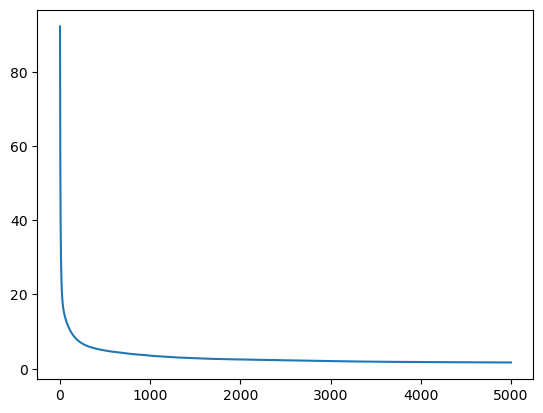

In [405]:
plt.plot(costs[:])

**Getting the final output from our model: which is $a^{[2]}$**

In [407]:
layer_values['a2']

array([[ 2.24879916,  1.43232169,  1.22180336,  0.49858573, -0.52951005,
        -0.5049227 ,  0.05927908,  1.8243459 ,  1.84502812, -0.41124807,
        -0.4477381 ,  1.10213595,  0.36759507,  0.09136871,  1.6617331 ,
        -0.48666622, -0.32107567,  1.10810428,  0.77139747,  1.05854938,
        -0.25445696, -0.50115106, -1.12864826, -0.88915123, -0.66966711,
        -0.44953775,  1.53895394,  0.76510115, -0.63359384, -0.75804933,
        -0.06784865, -0.70103609, -0.66989325, -0.63431174,  0.11286321,
         0.76470084,  2.10191427, -1.28865453, -1.06812192, -0.90807249,
        -0.86591145, -0.07484257,  2.8898685 , -0.84794554, -1.29703824,
         0.5520376 , -1.23903829,  0.32735145,  0.29250817, -0.82598111,
        -0.42047471, -0.07384878, -0.30641883, -1.34884514,  0.13892841,
        -0.89115142, -0.53302892,  0.68457157, -0.58907165,  0.01538135,
        -0.95458325, -0.95791652,  0.00370537,  1.31342604,  2.08071478,
        -0.26566136, -0.64017118, -0.40776006, -0.1

_And here are our real values:_

In [409]:
y_train

array([[ 2.38164341e+00,  1.05572045e+00,  1.19902587e+00,
         4.68585625e-01, -5.55422031e-01, -4.28812389e-01,
         8.59740689e-02,  1.99207528e+00,  1.88077010e+00,
        -3.45333504e-01, -6.51422749e-01,  1.44250595e+00,
         3.64237019e-01,  1.55539806e-01,  1.83903065e+00,
        -4.84464979e-01, -2.82724340e-01,  1.14754722e+00,
         3.99019888e-01,  1.47033225e+00, -2.75767766e-01,
        -4.70551831e-01, -1.16620921e+00, -9.01859404e-01,
        -6.11074621e-01, -5.19247847e-01,  1.85294380e+00,
         6.35543395e-01, -4.00986094e-01, -6.98727450e-01,
        -1.83745374e-02, -6.24292111e-01, -6.09683306e-01,
        -6.06205019e-01,  4.42346264e-02,  7.25978854e-01,
         9.16394191e-01, -1.30534068e+00, -1.01316458e+00,
        -1.10012176e+00, -8.87946256e-01, -5.31574061e-02,
         3.68641838e+00, -8.46206814e-01, -1.26360124e+00,
         3.15541003e-01, -1.15229606e+00,  8.45827541e-02,
         4.30324470e-01, -6.80640358e-01, -4.70551831e-0

_which are pretty close_

## In the next notebook, we will code classification task, and will also do modular programming with our own python classes and support files.

#### So, in this notebook we discussed the basics of neural networks. Now, there are many problems associated with this implementation, some of which includes -

- This is unoptimized
- Skewed Input features (Solution: Normalization, Batch Normalization)
- Vanishing and Exploding gradients (Solution: Random initialization of weights, gradient clipping, batch norm, etc)
- Slow and skewed optimization (Solution: momentum, RMSprop, Adam, learning rate decay)
- Handling bias and variance (Solution: Dropout and L1/L2 regularization, early stopping)

**We will discuss all these issues and solution to the different problems associated with the Neural Networks in the next notebook. Also, this notebook contains our Python & Numpy implementation of the NN, to look into DAX, Tensorflow and Pytorch implementation, please visit the respective folder in the main repo.**